In [1]:
#Importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("spam_ham_dataset.csv")
data.head()

,text,spam
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
data.shape

(5171, 2)

In [4]:
data['text'][0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [5]:
data['spam'].value_counts()

spam
0    3672
1    1499
Name: count, dtype: int64

In [6]:
import seaborn as sns

<Axes: ylabel='count'>

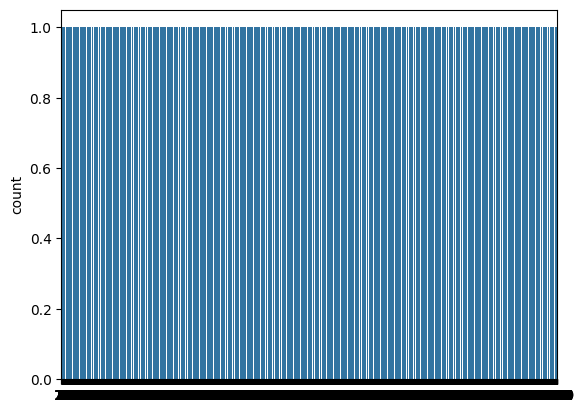

In [7]:
sns.countplot(data['spam'])

In [8]:
data.duplicated().sum()

np.int64(178)

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [12]:
data.shape

(4993, 2)

In [13]:
5171-178

4993

<Axes: ylabel='count'>

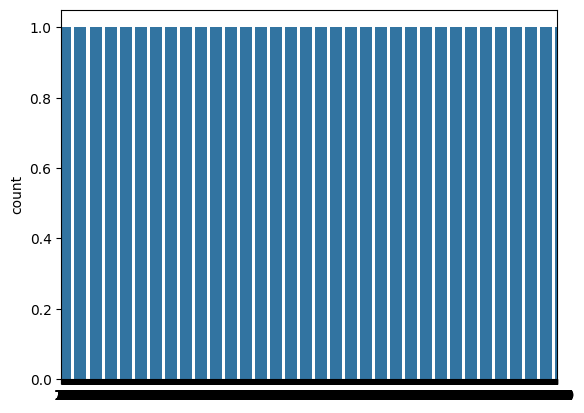

In [14]:
sns.countplot(data['spam'])

In [15]:
data['spam'].value_counts()

spam
0    3531
1    1462
Name: count, dtype: int64

Separate in X and Y

In [16]:
X = data['text'].values
y = data['spam'].values

In [17]:
y

array([0, 0, 0, ..., 0, 0, 1], shape=(4993,))

Train - Test split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state= 0)

In [19]:
X_train.shape

(3994,)

In [20]:
X_test.shape

(999,)

In [21]:
y_train.shape

(3994,)

In [22]:
y_test.shape

(999,)

Preprocessing

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
cv = CountVectorizer()

Training by ML Algorithm

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
nb = MultinomialNB()

In [26]:
pipe = make_pipeline(cv, nb)

In [27]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [28]:
y_pred = pipe.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.975975975975976

In [30]:
email = ['Hey i am Elon Musk. Get a brand new car from Tesla']
pipe.predict(email)

array([1])

In [31]:
import pickle
pickle.dump(pipe, open("Naive_model.pkl",'wb'))